In [1]:
!pip install shap lime

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 136.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 106.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283914 sha256=192e8c5db1d8195839c8dfa87b5b7f374b71cb259e2c2f8a57bc856a075af438
  Stored in directory: /home/datalore/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Załaduj dane i dopasuj PCA jak wcześniej
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import shap

import lime
import lime.lime_tabular

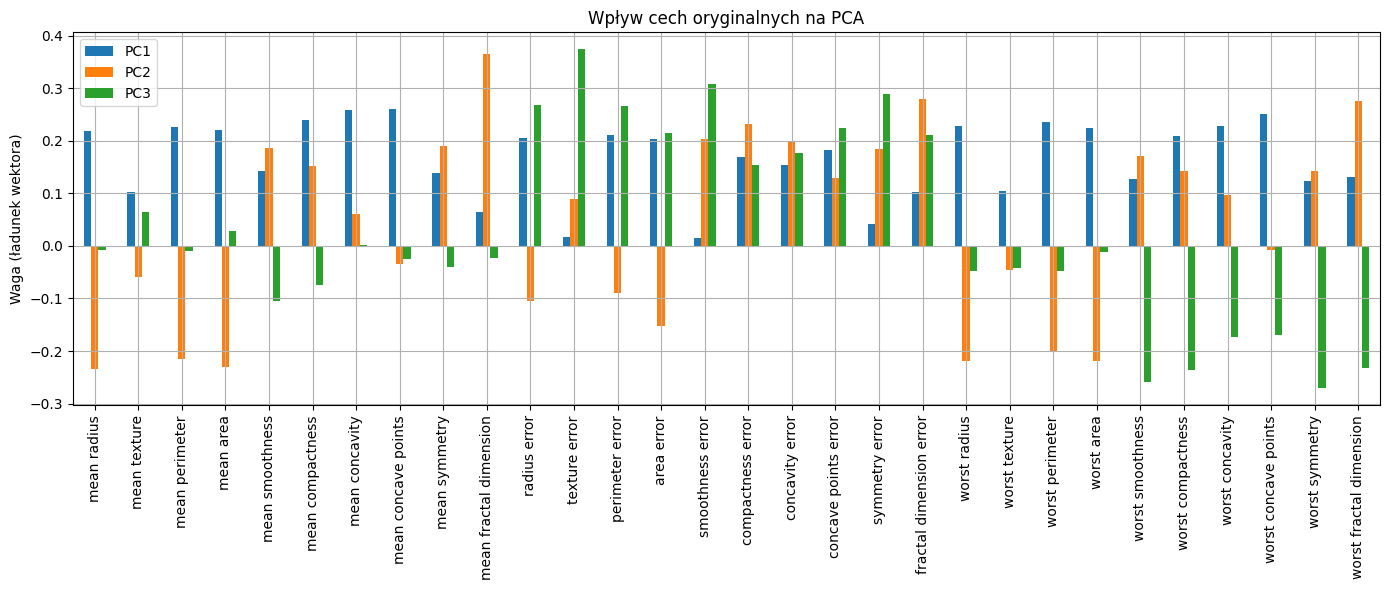

In [3]:
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled)

# PCA komponenty
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])
components_df.T.plot.bar(figsize=(14, 6), title="Wpływ cech oryginalnych na PCA")
plt.ylabel("Waga (ładunek wektora)")
plt.grid(True)
plt.tight_layout()
plt.show()

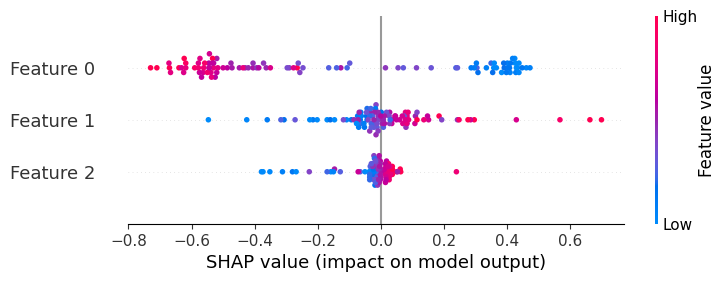

In [4]:
# Przekształcamy oryginalne dane treningowe do PCA
X_pca = pca.transform(X_scaled)

# Dopasuj model
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge')
clf.fit(X_pca, data.target)

# Obiekt SHAP dla PCA
explainer = shap.Explainer(clf.predict, X_pca)
shap_values = explainer(X_pca[:100])  # pierwsze 100 próbek

# Wizualizacja: wartości SHAP
shap.plots.beeswarm(shap_values)

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
# 1. Wczytanie danych
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# 2. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standaryzacja
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.vstack((X_train_scaled, X_test_scaled))

# 4. Redukcja wymiarów (PCA)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 5. Klasyfikator – liniowy SVM (SGD)
clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_pca, y_train)

# 6. LIME – wyjaśnianie
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_scaled,
    feature_names=feature_names,
    class_names=class_names,
    verbose=True,
    mode='classification'
)

# 7. Wyjaśnienie konkretnej próbki
i = 0  # indeks próbki
exp = explainer.explain_instance(
    X_scaled[i],
    lambda x: clf.predict_proba(pca.transform(x))
)

# 8. Prezentacja wyników
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
plt.show()

Intercept 0.30787912240009835
Prediction_local [1.26316725]
Right: 1.0


ImportError: ImportError: cannot import name 'display' from 'IPython.core.display' (/opt/python/envs/default_3_11/lib/python3.11/site-packages/IPython/core/display.py)